# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [3]:
import pandas as pd
data = pd.read_csv("/content/National_Health_and_Nutrition_Examination_Survey__NHANES____Vision_and_Eye_Health_Surveillance.csv")

data.shape

(10320, 36)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [4]:
unique_counts = data.nunique()
unique_counts_sorted = unique_counts.sort_values(ascending=False)
print("\nNumber of unique values in each column:")
print(unique_counts_sorted)
most_diverse_column = unique_counts_sorted.index[0]
print(f"\nColumn with most unique values: {most_diverse_column}")
print(f"Number of unique values: {unique_counts_sorted[0]}")
second_most_diverse = unique_counts_sorted.index[1]
print(f"\nSecond most diverse column: {second_most_diverse}")
print(f"Number of unique values: {unique_counts_sorted[1]}")


Number of unique values in each column:
Sample_Size                   1888
High_Confidence_Limit          780
Data_Value                     744
Low_Confidence_limit           713
Response                        12
ResponseID                      12
QuestionID                      11
Question                        11
CategoryID                       9
Category                         9
AgeID                            7
Age                              7
RaceEthnicityID                  5
RaceEthnicity                    5
RiskFactor                       4
RiskFactorID                     4
GenderID                         3
RiskFactorResponse               3
Data_Value_Footnote_Symbol       3
TopicID                          3
Gender                           3
Topic                            3
RiskFactorResponseID             3
Data_Value_Footnote              3
YearStart                        2
LocationID                       1
YearEnd                          1
Data_Value_Typ

<ipython-input-4-f3e3b2771407>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of unique values: {unique_counts_sorted[0]}")
<ipython-input-4-f3e3b2771407>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of unique values: {unique_counts_sorted[1]}")


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [5]:
unique_counts = data.nunique()
redundant_columns = unique_counts[unique_counts == 1]

if len(redundant_columns) > 0:
    print("Columns with only one unique value:")
    for column in redundant_columns.index:
        single_value = data[column].iloc[0]
        print(f"\nColumn: {column}")
        print(f"Value: {single_value}")
else:
    print("No columns found where all rows have the same value.")

Columns with only one unique value:

Column: YearEnd
Value: 2008

Column: LocationAbbr
Value: US

Column: LocationDesc
Value: National

Column: DataSource
Value: NHANES

Column: Data_Value_Unit
Value: %

Column: Data_Value_Type
Value: Crude Prevalence

Column: LocationID
Value: 59


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

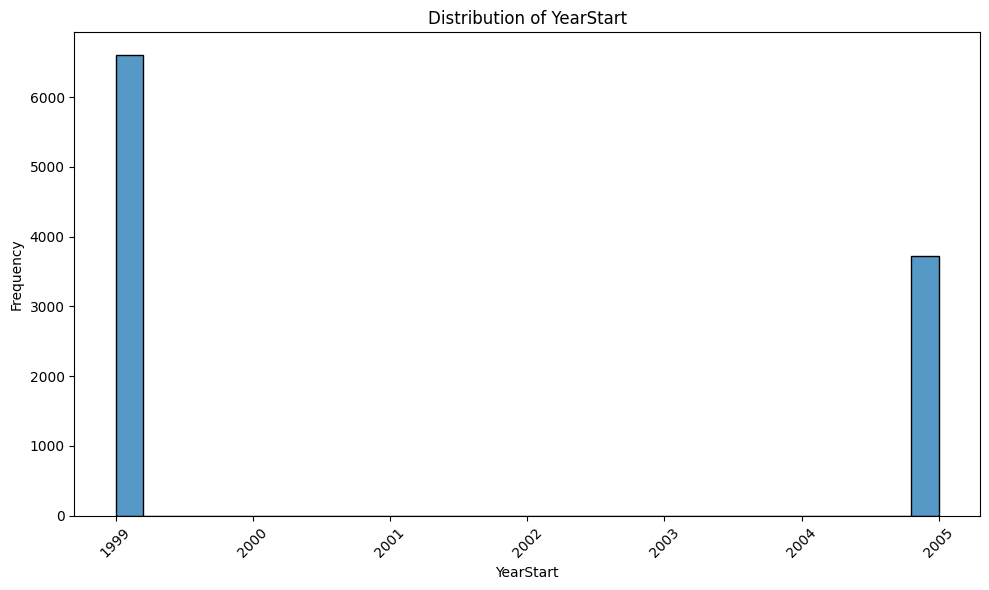

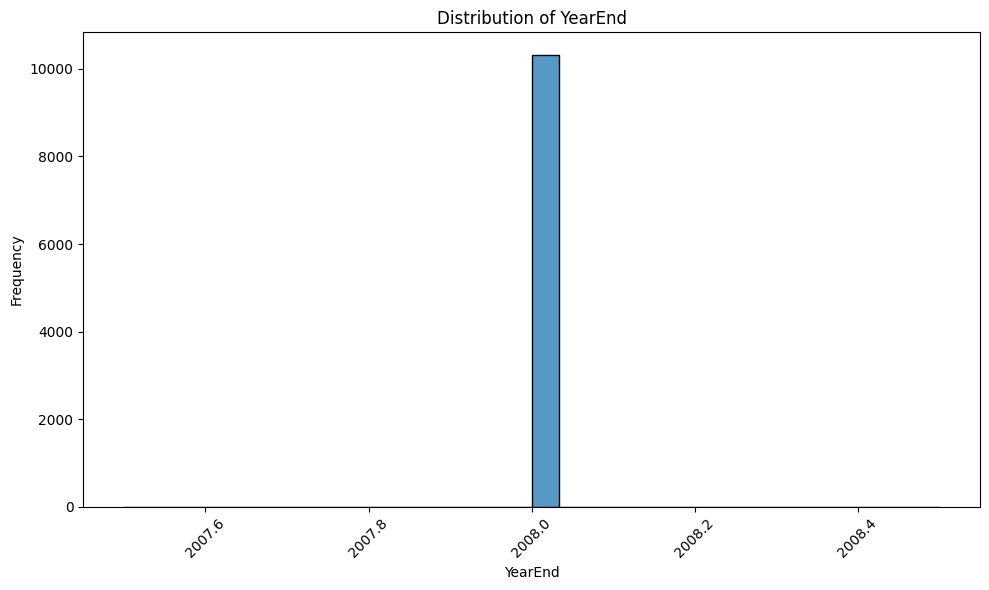

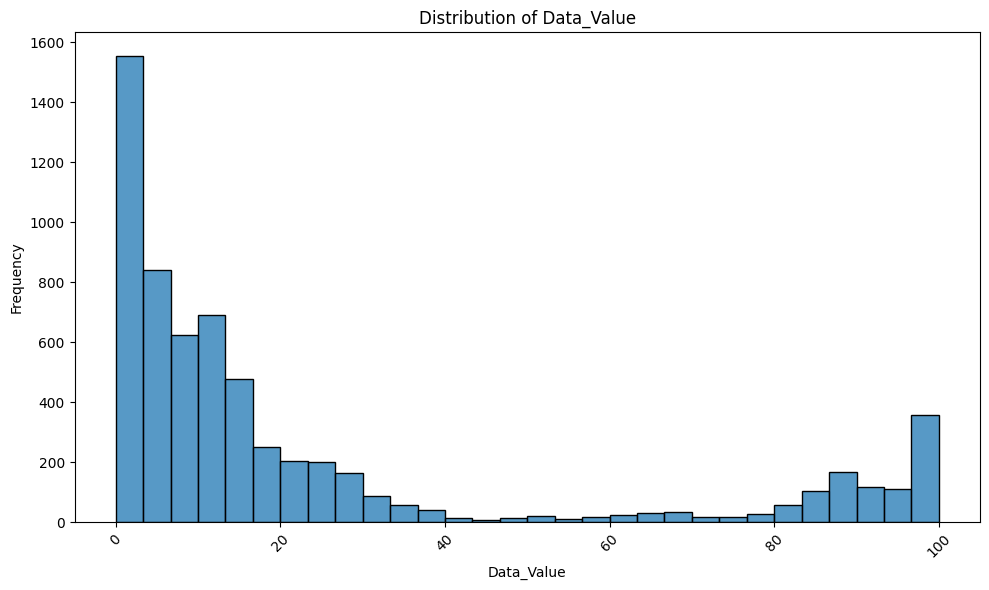

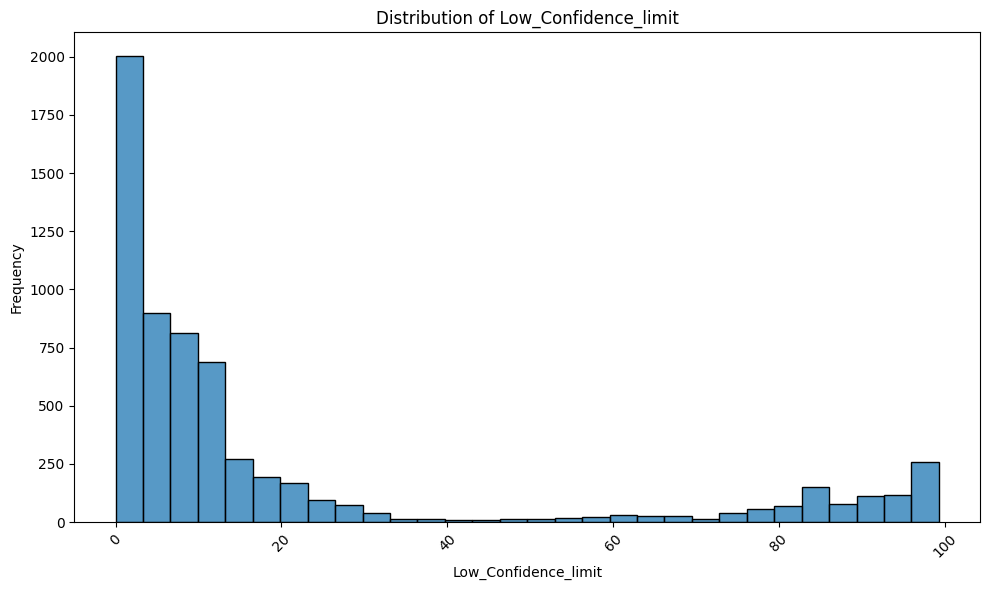

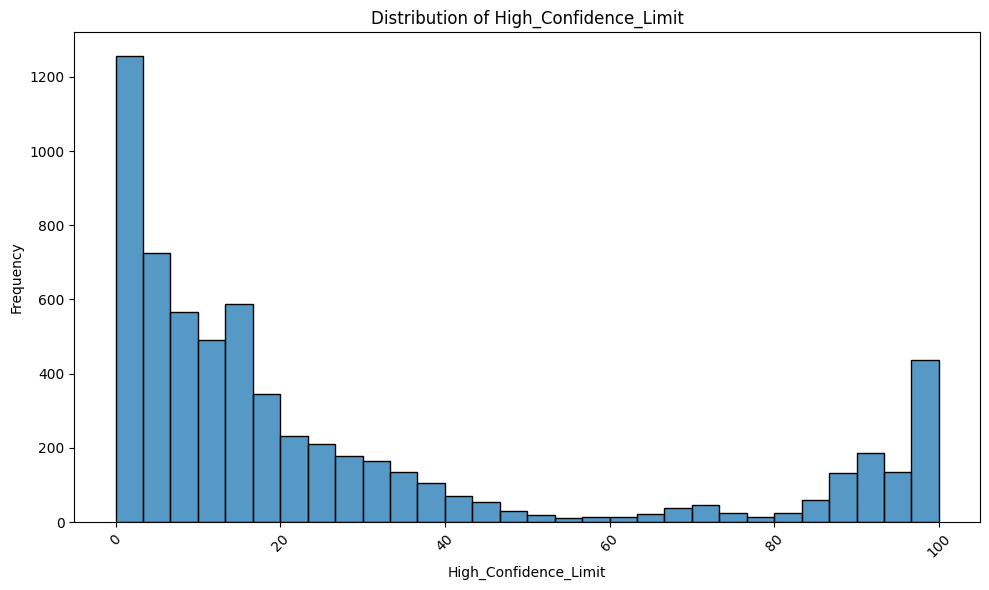

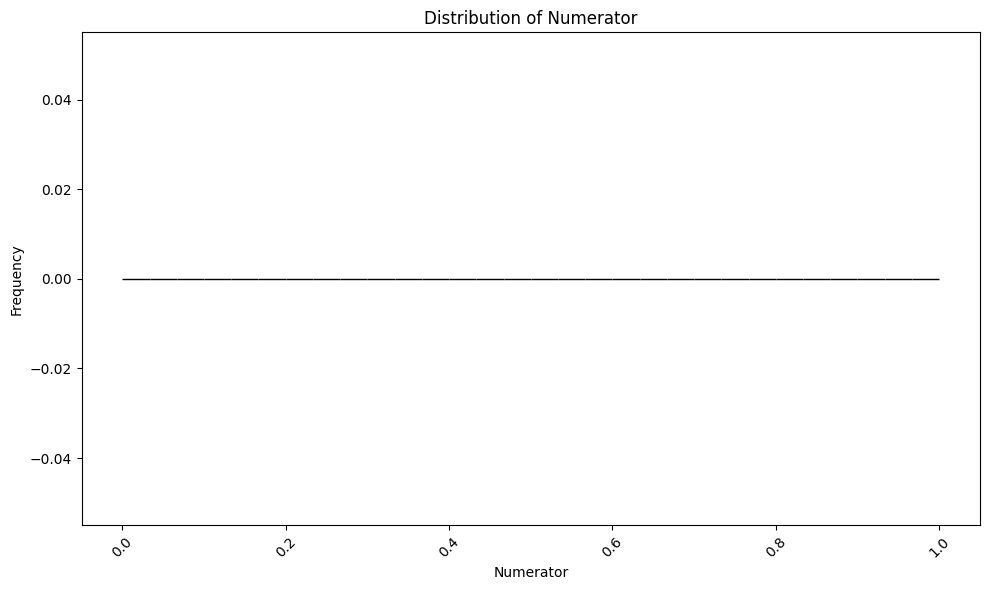

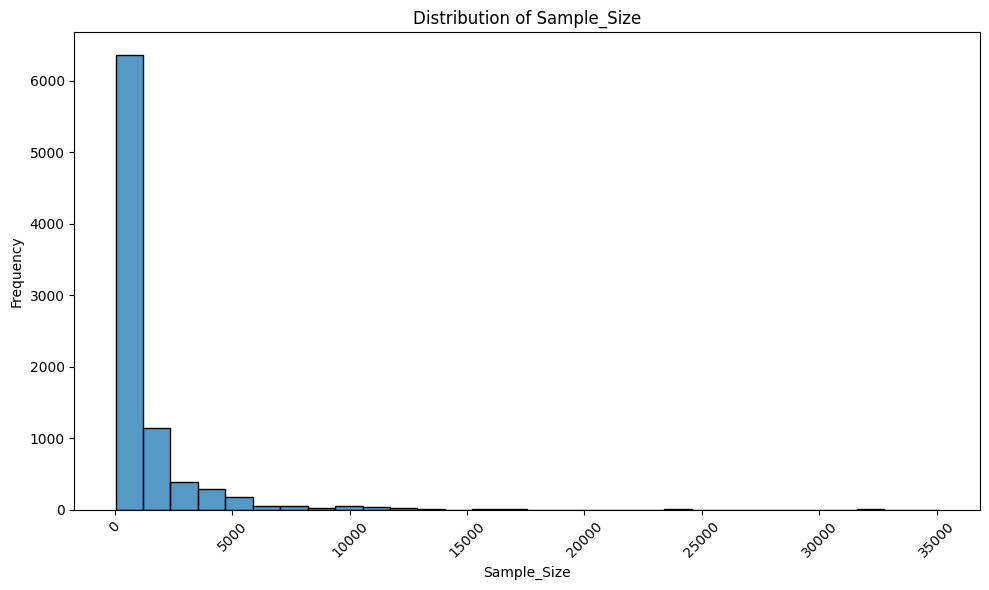

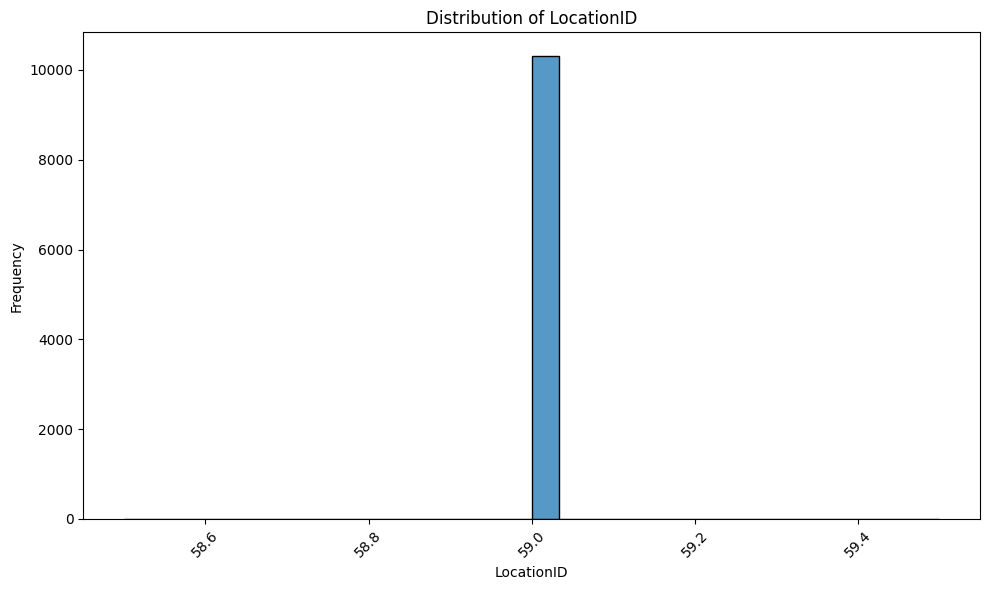

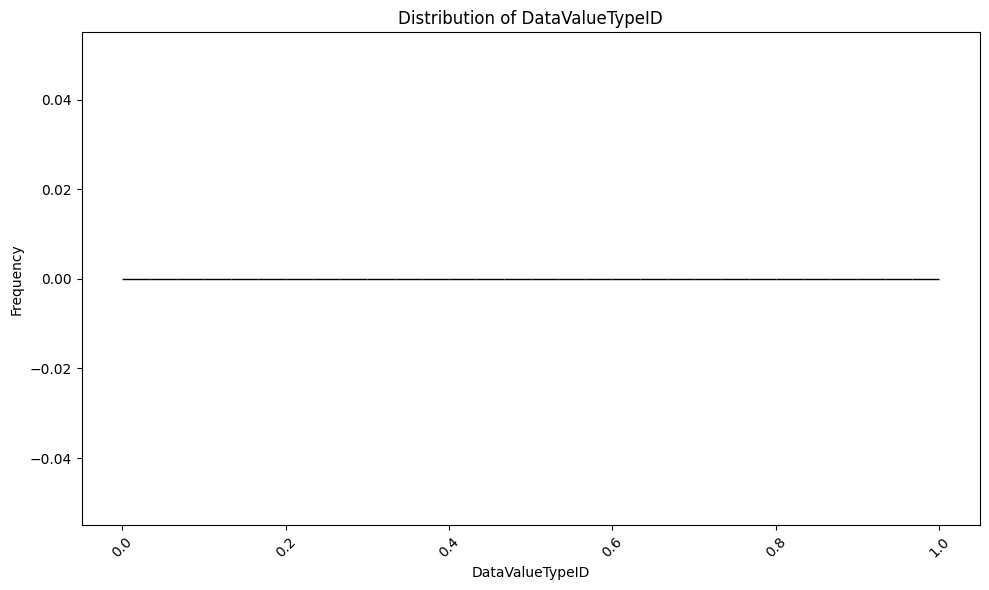

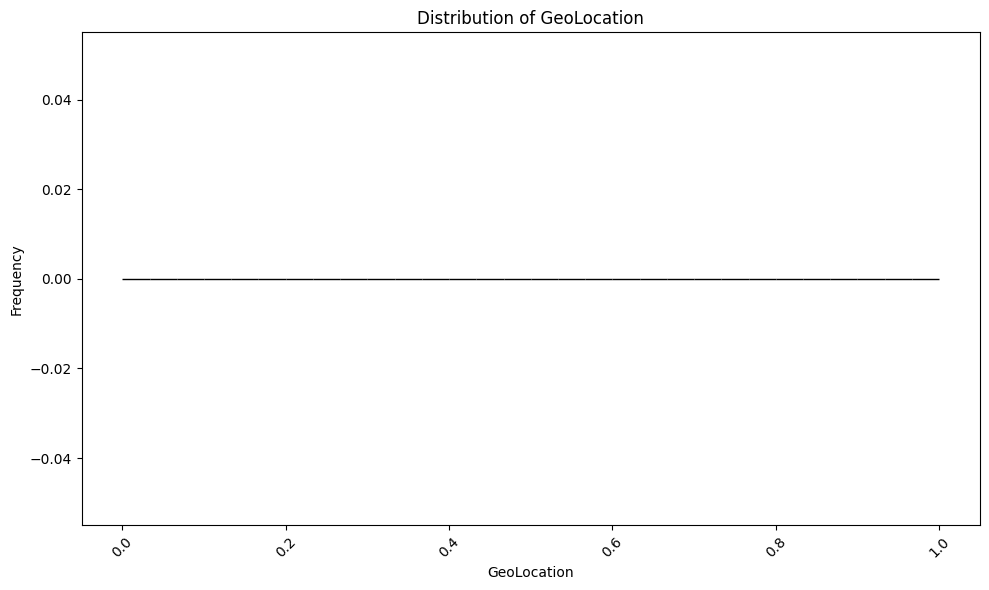

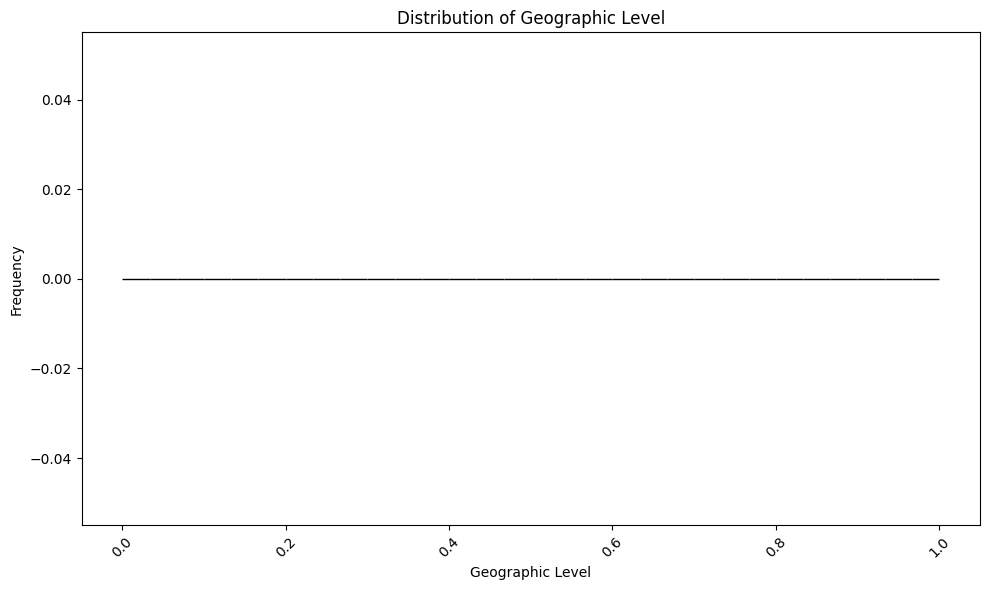


Basic statistics for numeric columns:
          YearStart  YearEnd   Data_Value  Low_Confidence_limit  \
count  10320.000000  10320.0  6328.000000           6328.000000   
mean    2001.162791   2008.0    23.670702             20.277276   
std        2.880952      0.0    31.245569             30.055377   
min     1999.000000   2008.0     0.000000              0.000000   
25%     1999.000000   2008.0     3.400000              2.200000   
50%     1999.000000   2008.0    10.800000              7.700000   
75%     2005.000000   2008.0    25.000000             17.700000   
max     2005.000000   2008.0   100.000000             99.300000   

       High_Confidence_Limit  Numerator   Sample_Size  LocationID  \
count            6328.000000        0.0   8639.000000     10320.0   
mean               27.117668        NaN   1236.882278        59.0   
std                32.022886        NaN   2400.059894         0.0   
min                 0.000000        NaN     30.000000        59.0   
25%         

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Print basic statistics for each numeric column
print("\nBasic statistics for numeric columns:")
print(data[numeric_columns].describe())

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

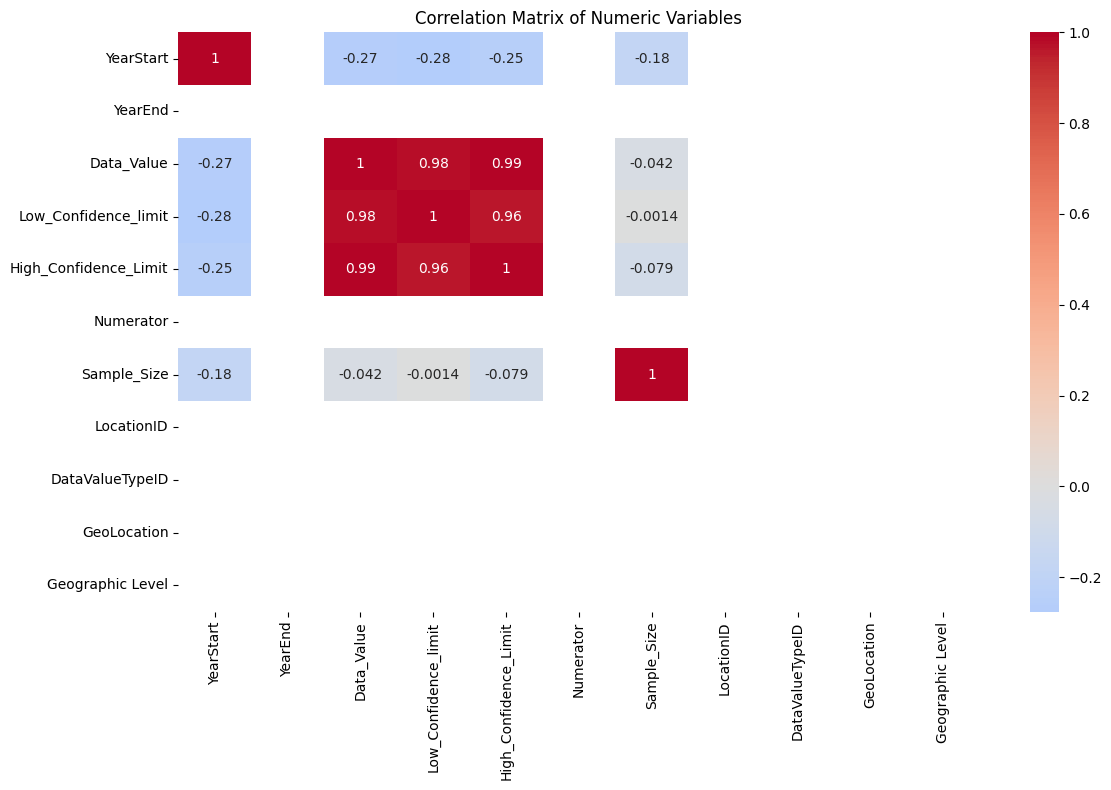

In [7]:
def correlation_analysis(data):
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_columns) > 1:
        correlation_matrix = data[numeric_columns].corr()

        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix of Numeric Variables')
        plt.tight_layout()
        plt.show()

correlation_analysis(data)



---



## Submitting Your Work

Submit your work as usual.